# TME3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted : 
 - given a regular grid, a sampling of a continuous 2D signal can be modelled as follow:
$$
x_e(t,u) = x(t,u)e(t,u)\quad \text{with}\quad e(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_e,u - lT_e)
$$ $e$ is the analog of Dirac comb in 2D
 - spectrum of $x_e$ writes:
$$
X_e(f,g) = \frac1{T_e^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_e,g-lf_e)
$$
2D sampling then implies a periodisation of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if 2D Shannon condition is verified (band limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_e(kT_e,lT_e) \operatorname{sinc}(\pi f_e (t-kT_e)) \operatorname{sinc}(\pi f_e(u - lTe))\qquad\qquad\qquad\text{(1)}
$$
so called Shannon interpolation.
 
## Exercice 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>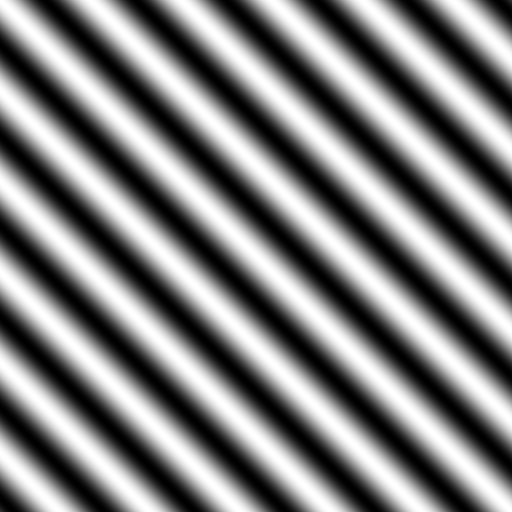</div>
The goal of this exercice is to study the limit conditions of sampling of this image in order to avoid aliasing.

In [4]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
%matplotlib notebook 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Te, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Te-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Te-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig=plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()
    

    

1. We provide the function `sinusoid2d(A, theta, L, T0, Te)` that allows to sample signal $s_\theta$ with a sampling period of `Te` (the grid is regular with the sample sampling value for directions $u$ and $t$). Paremeters `A`, `theta`, `L` and `T0` respectively control the amplitude, orientation and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `T_e=1`.


<IPython.core.display.Javascript object>


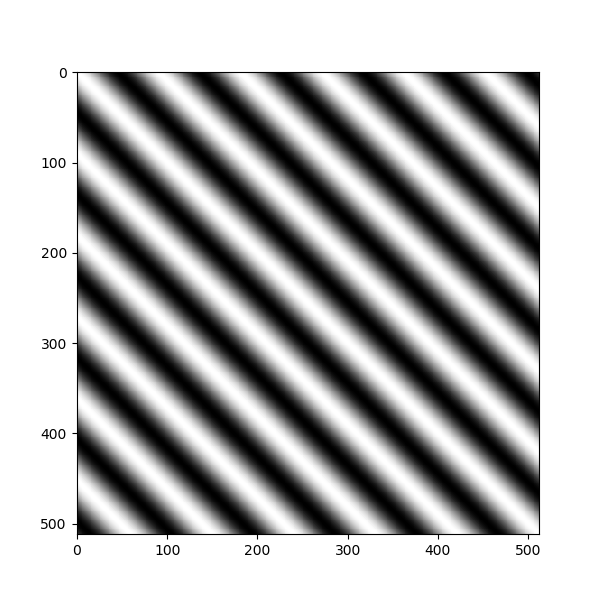

In [11]:
I1=sinusoid2d(A=1,theta=45,T0=64,Te=1,size=512)
imshow(I1)

2. What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ is the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

Fm est la fréquence limite car comme nous l'avons vu en cours, il faut prendre en compte les fréquences dans les 2 sens dans le cas d'une image en 2D.


In [80]:
import math
'''T0=64
ft = (1/T0) * math.cos(math.radians(10))
fu = (1/T0) * math.sin(math.radians(10))'''
T0=64
Tt=T0 * math.cos(math.radians(45))
Tu=T0 * math.sin(math.radians(45))
ft = (1/Tt)
fu = (1/Tu)
Fm=max(ft,fu)
Fm

0.022097086912079608

2. (a)  Sample $s_{45}$ with $f_e = 16 f_m$ and display the sampled signal.

<IPython.core.display.Javascript object>


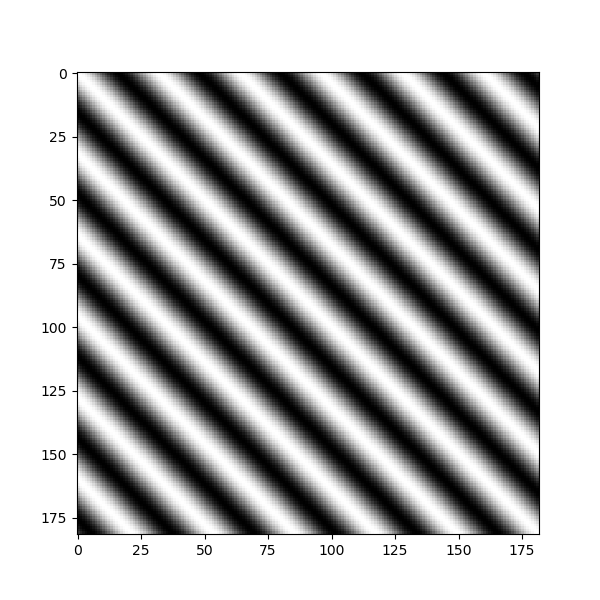

In [86]:
Fe=16*Fm
Te=1/Fe
I1bis=sinusoid2d(A=1,theta=45,T0=64,Te=Te,size=512)
imshow(I1bis)

2. (b) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

<IPython.core.display.Javascript object>


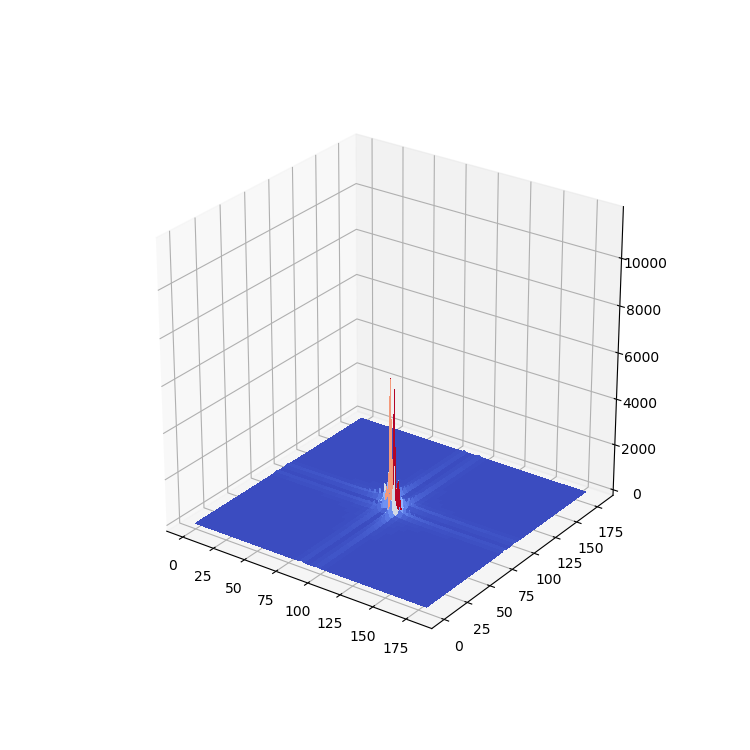

In [87]:
I2=fft2(I1bis)

def toVisualizeFT(I2):
    return fftshift(np.abs(I2))

def toVisualizeLogFT(If):
    return np.log(1+np.fft.fftshift(np.abs(If)))
    """ Array[complex] -> Array[float] """
    
I2=toVisualizeFT(I2)
surf(I2)

3. (c) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_e$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of theses differences?
    - (Bonus question):
        - Why, aside the two Dirac peaks, there are somes structures? Explain the origin of these lobes.
        - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfer.

4. (a) Sample $s_{45}$ with $f_0=4 f_m$ and display the sampled signal.

<IPython.core.display.Javascript object>


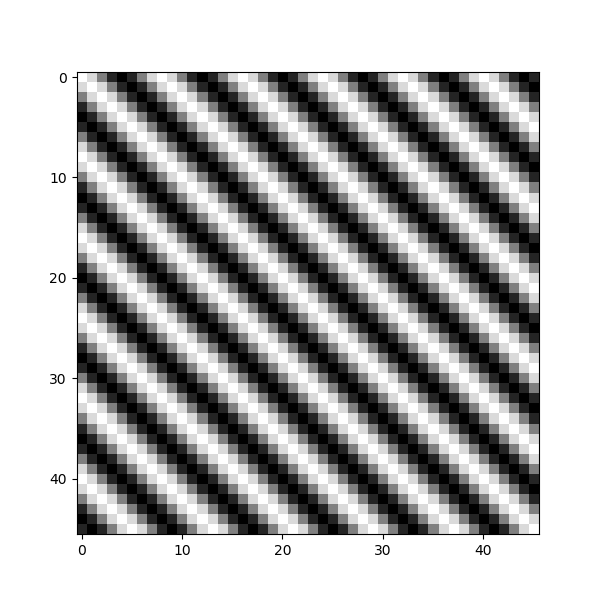

In [88]:
Fe=4*Fm
Te=1/Fe
I4=sinusoid2d(A=1,theta=45,T0=64,Te=Te,size=512)
imshow(I4)

4. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [89]:
def error()
sum1=
return 

SyntaxError: invalid syntax (<ipython-input-89-4cf034385363>, line 1)

4. (c) Reconstruct the sampled signal. Display original and reconstruted signal.

Print the orignal signal. Print the relative average error between the original and reconstructed images. What is the origin of this error?

<IPython.core.display.Javascript object>


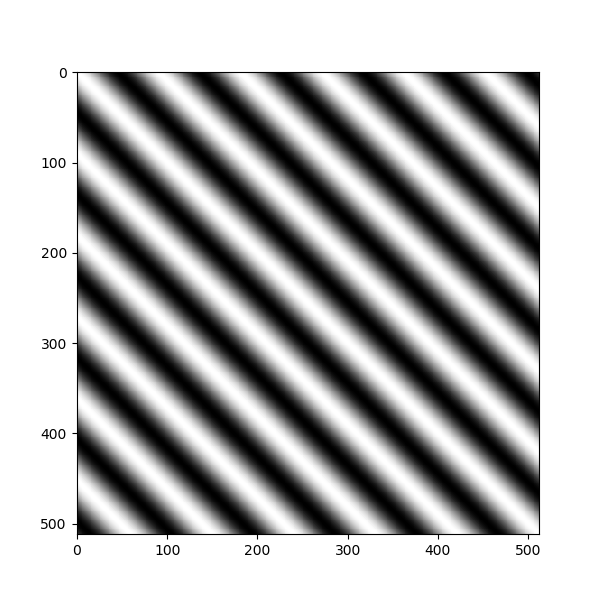

<IPython.core.display.Javascript object>


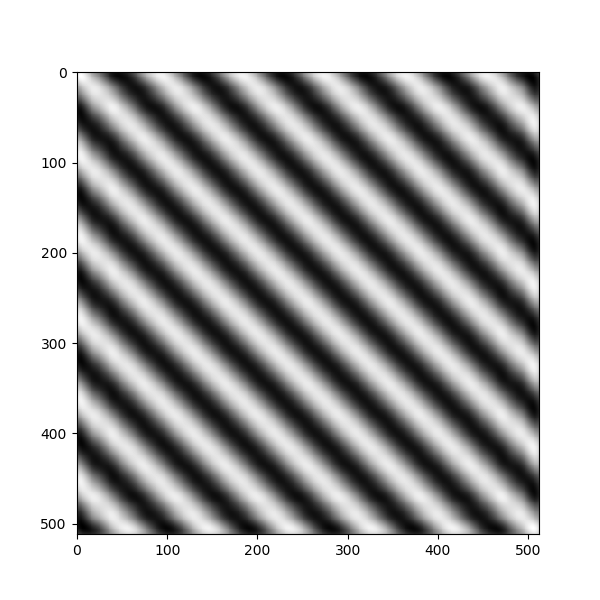

In [90]:
imshow(I1)
I5=shannonInterpolation(I4,Te=Te,size=512)
imshow(I5)

5. Same question than 4. with $f_e = \frac32f_m$. Comment the effects of aliasing.

<IPython.core.display.Javascript object>


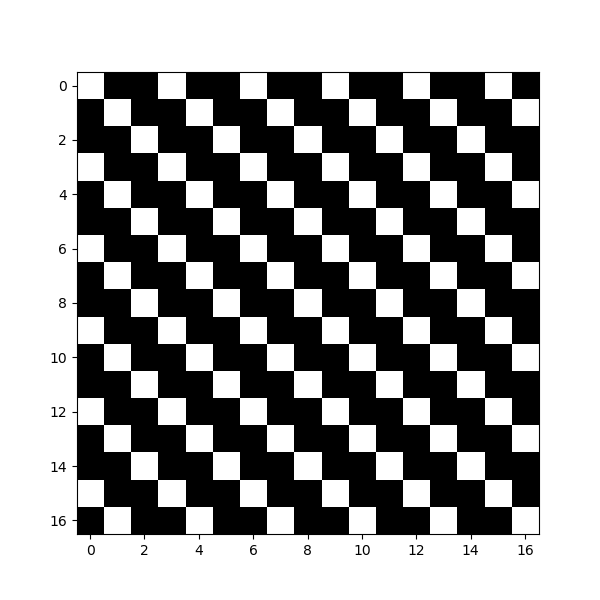

<IPython.core.display.Javascript object>


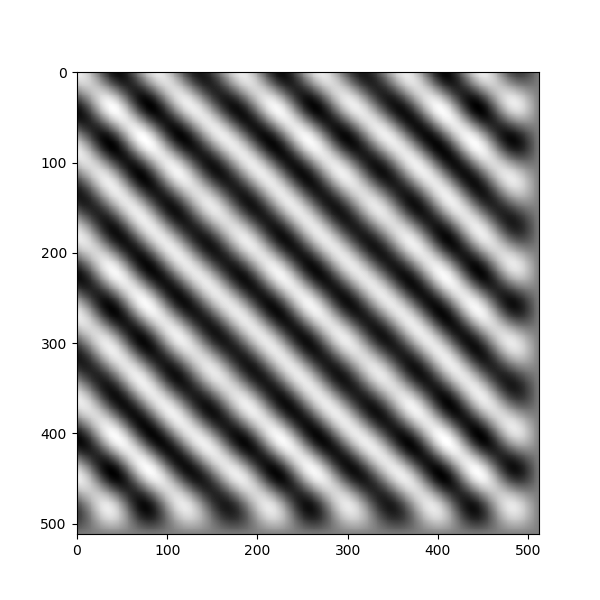

<IPython.core.display.Javascript object>


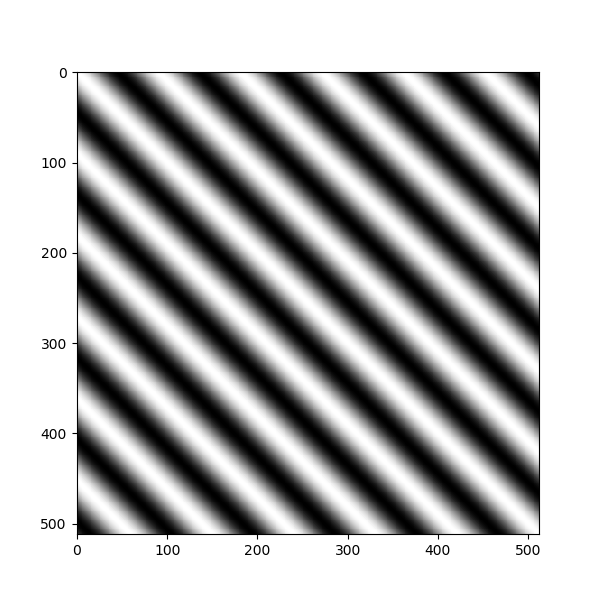

In [69]:
Fe=3*Fm/2
Te=1/Fe
I6=sinusoid2d(A=1,theta=45,T0=64,Te=Te,size=512)
imshow(I6)
I7=shannonInterpolation(I6,Te=Te,size=512)
imshow(I7)
imshow(I1)

6. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_e$ what is the additional drawback appearing after the reconstruction? Explain.

<IPython.core.display.Javascript object>


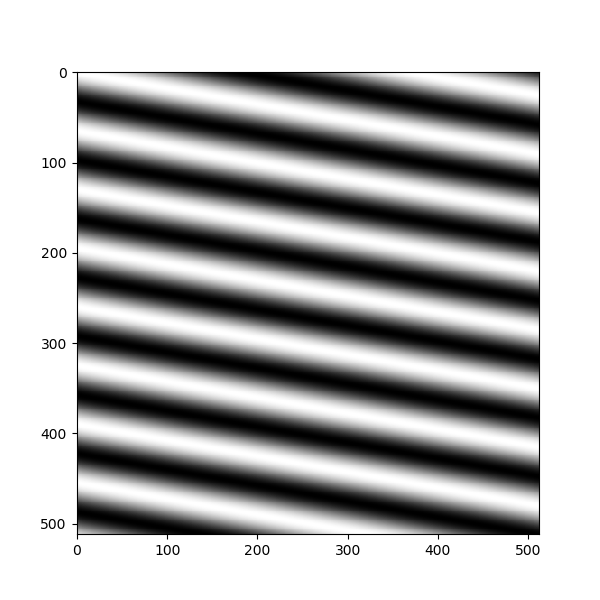

63.02769619278131 11.113483370683541


<IPython.core.display.Javascript object>


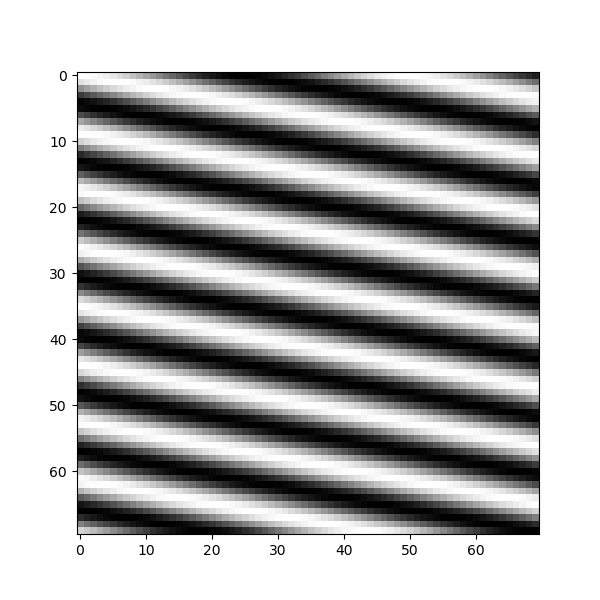

<IPython.core.display.Javascript object>


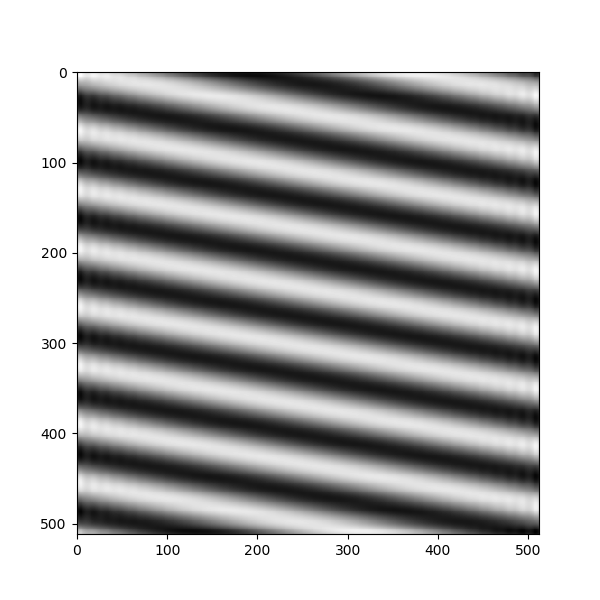

In [75]:
I8=sinusoid2d(A=1,theta=10,T0=64,Te=1,size=512)
imshow(I8)
T0=64
Tt=T0 * math.cos(math.radians(10))
Tu=T0 * math.sin(math.radians(10))
print(Tt,Tu)
ft = (1/Tt)
fu = (1/Tu)
Fm=max(ft,fu)
Fe=(3*Fm)/2
Te=1/Fe
I9=sinusoid2d(A=1,theta=10,T0=64,Te=Te,size=512)
imshow(I9)
I10=shannonInterpolation(I9,Te=Te,size=512)
imshow(I10)

7. Bonus question: write a function `shannonInterpolationLoop()` implementing equation (1) using two loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Run time way be measured using `tic()` and `tac()` functions.

In [31]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

### your code starts below



## Exercice 2: aliasing on natural images

In this exercice, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

In [92]:
from PIL import Image

barbara = np.array(Image.open('img/barbara.png'))

def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]



1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

L'échantillonage de facteur 2 ne garde que la moitié des pixels dans chaque direction , ce qui a pour effet de diminuer la qualité de l'image

2. Write a code that
 - iterates the subsampling process
 - computes the Fourier transform at each iteration, including the original image; and display frequencies

   Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

<IPython.core.display.Javascript object>


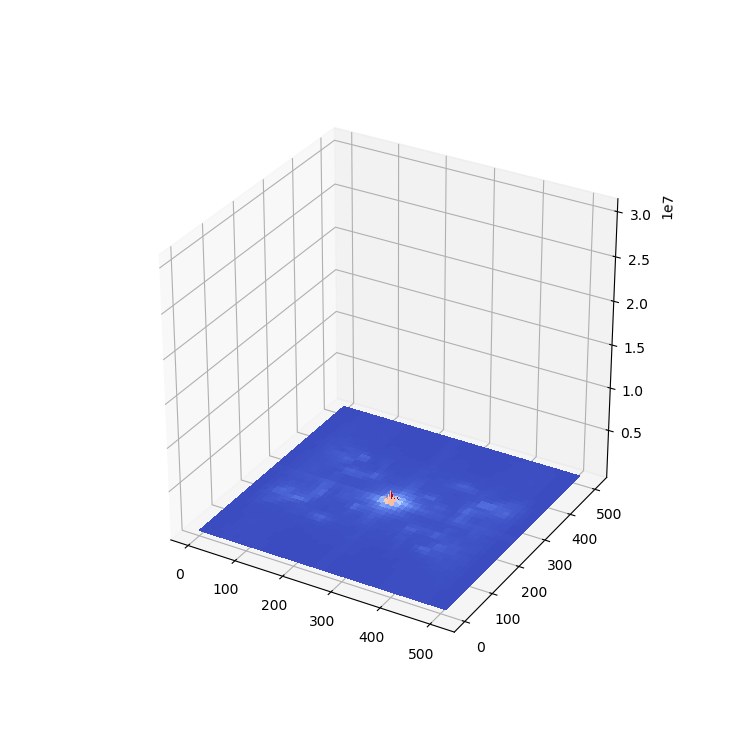

<IPython.core.display.Javascript object>


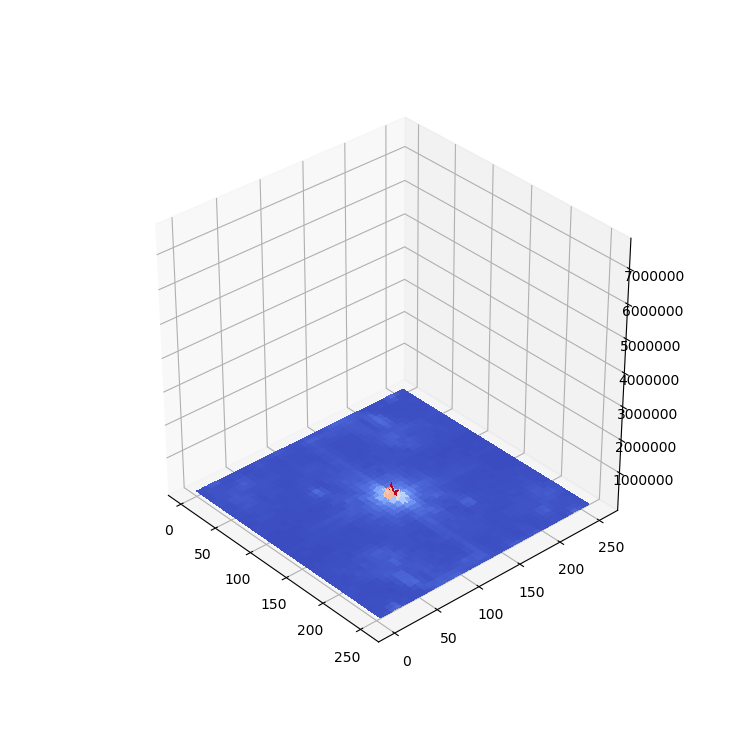

<IPython.core.display.Javascript object>


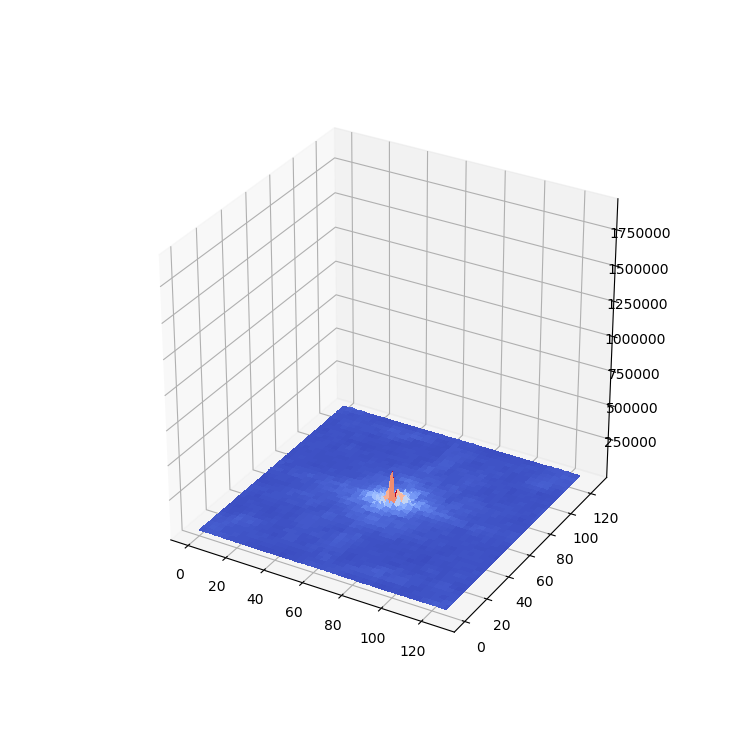

<IPython.core.display.Javascript object>


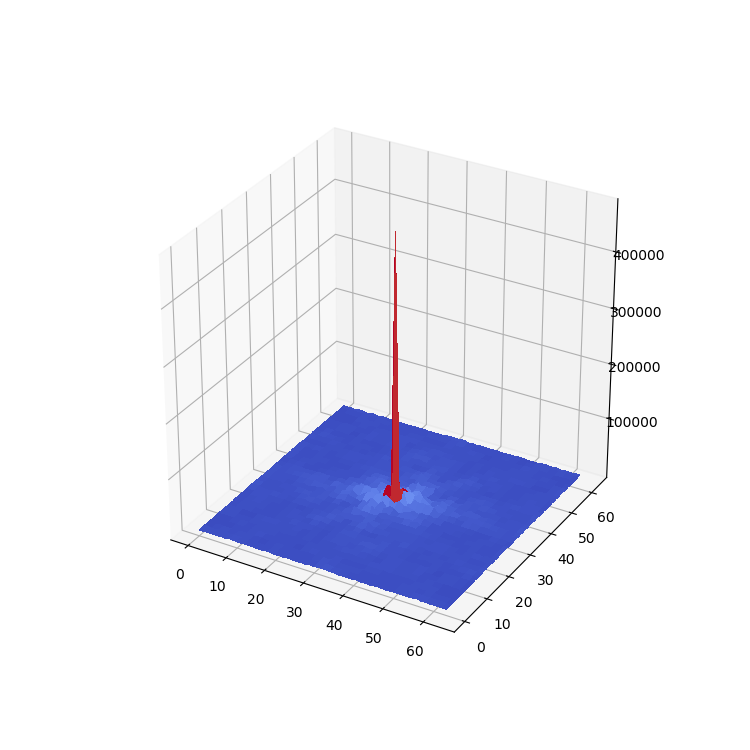

In [97]:

FTbarbara=fft2(barbara)
FTbarbara=toVisualizeFT(FTbarbara)
surf(FTbarbara)
newbarbara=barbara
for i in range (3):
    newbarbara=subSample2(newbarbara)
    FTbarbara=fft2(newbarbara)
    FTbarbara=toVisualizeFT(FTbarbara)
    surf(FTbarbara)

3. Bonus question: same question with the image `img/mandrill.png`.

In [ ]:
mandrill = np.array(Image.open('img/mandrill.png'))
### your code and comments start below

